In [233]:
import numpy as np
import nmrglue
import matplotlib.pyplot as plt
import pandas as pd
def analyze_dataset(all_data):
    # Create a DataFrame with real, imaginary, and time values
    time = np.linspace(0, AQ, len(all_data))
    df = pd.DataFrame({
        "Time": time,
        "Real": all_data.real,
        "Imaginary": all_data.imag
    })
    all_data=nmrglue.proc_base.ps(all_data, p0+90, p1) #Why is there an extra 90 here? Probably from ph31 convention?
    # Apply exponential apodization
    apodized_data = nmrglue.proc_base.em(all_data, .0004)
    #*********this function can only take real part and not full complex part. Do we want to edit this way?

    ls_and_apodized_data = nmrglue.proc_base.ls(apodized_data, 63)
    # Plot the results
    
    spectrum = nmrglue.proc_base.fft(ls_and_apodized_data) 
    n = len(all_data.real)
    freq = np.linspace(-SWH / 2+center, SWH / 2+center, n) #I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.
    return (freq,np.real(spectrum), np.imag(spectrum))
    

In [234]:
# Important Acqus Parameters
AQ=1.6# Acquistion time (s)
SWH=2000 #Spectral Width [Hz]
SF=202.4765750 #Spectrometer frequency [Mhz]
SFO1=202.4751988 #Transmitter frequency [Mhz]
p0=-40
p1=0

center=-(SF-SFO1)*10**6
plot_width=30

In [235]:
#Call in and define data
all_data0 = nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\pycharm_data\2024_12_23\phase\48")[1]

array00, array10, array20, array30 = all_data0
array00_processed = analyze_dataset(array00)
array10_processed = analyze_dataset(array10)
array20_processed = analyze_dataset(array20)

In [236]:
all_data1 = nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\pycharm_data\2024_12_23\phase\49")[1]


array01, array11, array21, array31 = all_data1
array01_processed = analyze_dataset(array01)
array11_processed = analyze_dataset(array11)
array21_processed = analyze_dataset(array21)

In [237]:
all_data2 = nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\pycharm_data\2024_12_23\phase\50")[1]

array02, array12, array22, array32 = all_data2
array02_processed = analyze_dataset(array02)
array12_processed = analyze_dataset(array12)
array22_processed = analyze_dataset(array22)

In [238]:
all_data3 = nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\pycharm_data\2024_12_23\phase\51")[1]

array03, array13, array23, array33 = all_data3
array03_processed = analyze_dataset(array03)
array13_processed = analyze_dataset(array13)
array23_processed = analyze_dataset(array23)

In [239]:
#Bruker ns4
all_data4= nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\pycharm_data\2024_12_23\0010CNP_ns4_16\17")[1]

array04, array14, array24, array34 = all_data4
array04_processed = analyze_dataset(array04)
array14_processed = analyze_dataset(array14)
array24_processed = analyze_dataset(array24)

In [240]:
#Bruker ns1
all_data5= nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\pycharm_data\2024_12_23\0010CNP_ns1_30\31")[1]

array05, array15, array25, array35 = all_data5
array05_processed = analyze_dataset(array05)
array15_processed = analyze_dataset(array15)
array25_processed = analyze_dataset(array25)

In [241]:
x=array00_processed[0]

real_data0=array00_processed[1]+array10_processed[1]+array20_processed[1]
imag_data0=array00_processed[2]+array10_processed[2]+array20_processed[2]


real_data1=array01_processed[1]+array11_processed[1]+array21_processed[1]
imag_data1=array01_processed[2]+array11_processed[2]+array21_processed[2]


real_data2=array02_processed[1]+array12_processed[1]+array22_processed[1]
imag_data2=array02_processed[2]+array12_processed[2]+array22_processed[2]


real_data3=array03_processed[1]+array13_processed[1]+array23_processed[1]
imag_data3=array03_processed[2]+array13_processed[2]+array23_processed[2]


real_data4=array04_processed[1]+array14_processed[1]+array24_processed[1]
imag_data4=array04_processed[2]+array14_processed[2]+array24_processed[2]


real_data5=array05_processed[1]+array15_processed[1]+array25_processed[1]
imag_data5=array05_processed[2]+array15_processed[2]+array25_processed[2]

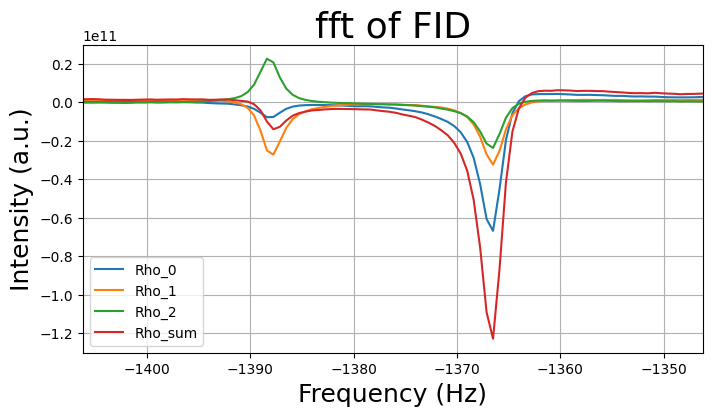

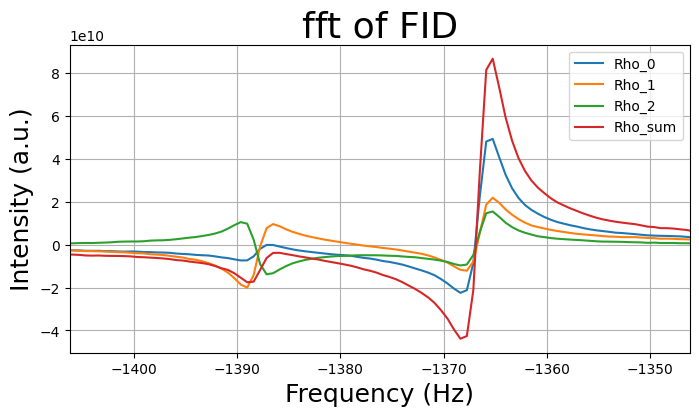

In [242]:
plt.figure(figsize=(8, 4))
plt.plot(x, array00_processed[1], label="Rho_0") 
plt.plot(x, array10_processed[1], label="Rho_1")
plt.plot(x, array20_processed[1], label="Rho_2")
plt.plot(x, real_data0, label="Rho_sum")
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize=(8, 4))   
plt.plot(x, array00_processed[2], label="Rho_0") 
plt.plot(x, array10_processed[2], label="Rho_1")
plt.plot(x, array20_processed[2], label="Rho_2")
plt.plot(x, imag_data0, label="Rho_sum")
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()

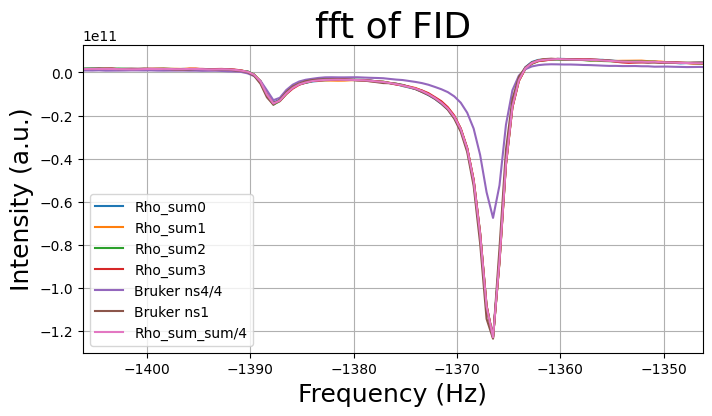

In [243]:
plt.figure(figsize=(8, 4))
plt.plot(x, real_data0, label="Rho_sum0")
plt.plot(x, real_data1, label="Rho_sum1")
plt.plot(x, real_data2, label="Rho_sum2")
plt.plot(x, real_data3, label="Rho_sum3")
plt.plot(x, real_data4/4, label="Bruker ns4/4")
plt.plot(x, real_data5, label="Bruker ns1")
plt.plot(x, (real_data0+real_data1+real_data2+real_data3)/4, label="Rho_sum_sum/4")
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.xlim(-1368,-1365)
#plt.gca().invert_xaxis()
plt.show()

In [244]:
all_data = nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\MIT\ADP_Sample_143-12_20_2024_GO\260")[1]

In [245]:
array4, array5, array6, array7 = all_data
array4_processed = analyze_dataset(array4)
array5_processed = analyze_dataset(array5)
array6_processed = analyze_dataset(array6)

x=array4_processed[0]
real_data2=array5_processed[1]+array5_processed[1]+array6_processed[1]
imag_data2=array4_processed[2]+array5_processed[2]+array6_processed[2]

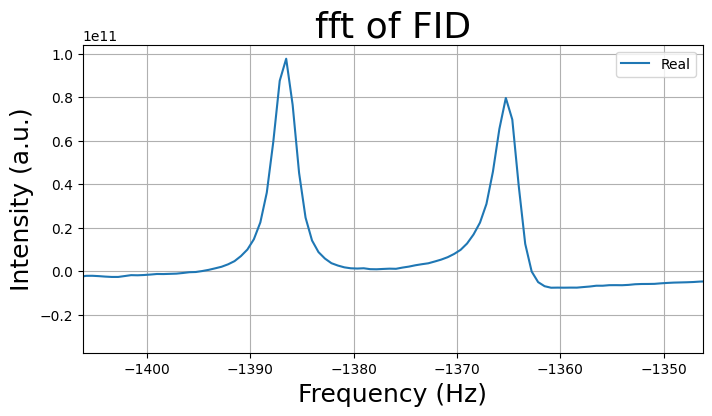

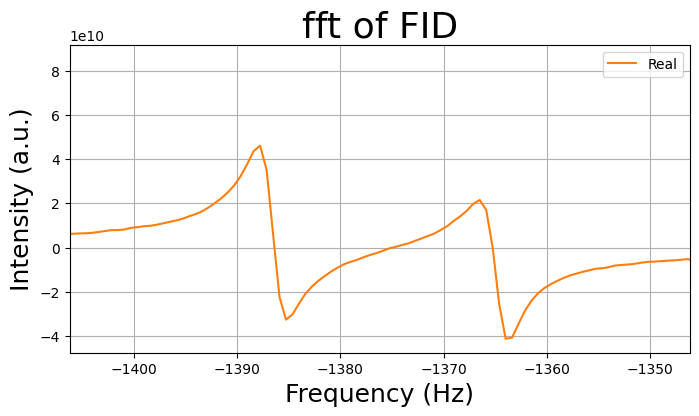

In [246]:
plt.figure(figsize=(8, 4))
plt.plot(x, real_data2, label="Real") 
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize=(8, 4))   
plt.plot(x, imag_data2, label="Real", color="#ff7f0e")
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()

In [247]:
plt.figure(figsize=(8, 4))
plt.plot(x, real_data+real_data2, label="Real", color="black") 

plt.plot(x, real_data, label="Real") 

plt.plot(x, real_data2, label="Real") 
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize=(8, 4))   
plt.plot(x, imag_data+imag_data2, label="Real", color="#ff7f0e")
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()

NameError: name 'real_data' is not defined

<Figure size 800x400 with 0 Axes>